In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import itertools as it
from scipy.special import comb

import matplotlib
font = {'size'   : 11}
matplotlib.rc('font', **font)

In [2]:
data_s = np.loadtxt('DepletedDense_DAG_3.txt')*0
data_d = np.loadtxt('DepletedDense_DAG_3.txt')

data_s2 = np.loadtxt('DepletedDense_Skeleton_3.txt')*0
data_d2 = np.loadtxt('DepletedDense_Skeleton_3.txt')

In [3]:
colors=['tab:blue','tab:cyan','tab:red','tab:orange','tab:green','tab:olive','tab:purple','tab:pink','k','tab:gray']
legends=['G2PC', 'FisherPC', 'G2Connected', 'FisherConnected', 'G2Knee', 'FisherKnee', 'G2pvalConnected', 'G2pvalKnee', 'NIConnected', 'NIKnee'] 
data=[data_s,data_d,data_s2,data_d2]
title=['DAG/Controlled','DAG/Matrix','Skeleton/Controlled','Skeleton/Matrix']
base=np.array([2,6,13,20,27,34,41,48,55,62])

base=np.array([2,6,20,34,41,48,55,62])
legends=['G2PC', 'FisherPC', 'FisherConnected', 'FisherKnee', 'G2pvalConnected', 'G2pvalKnee', 'NIConnected', 'NIKnee']

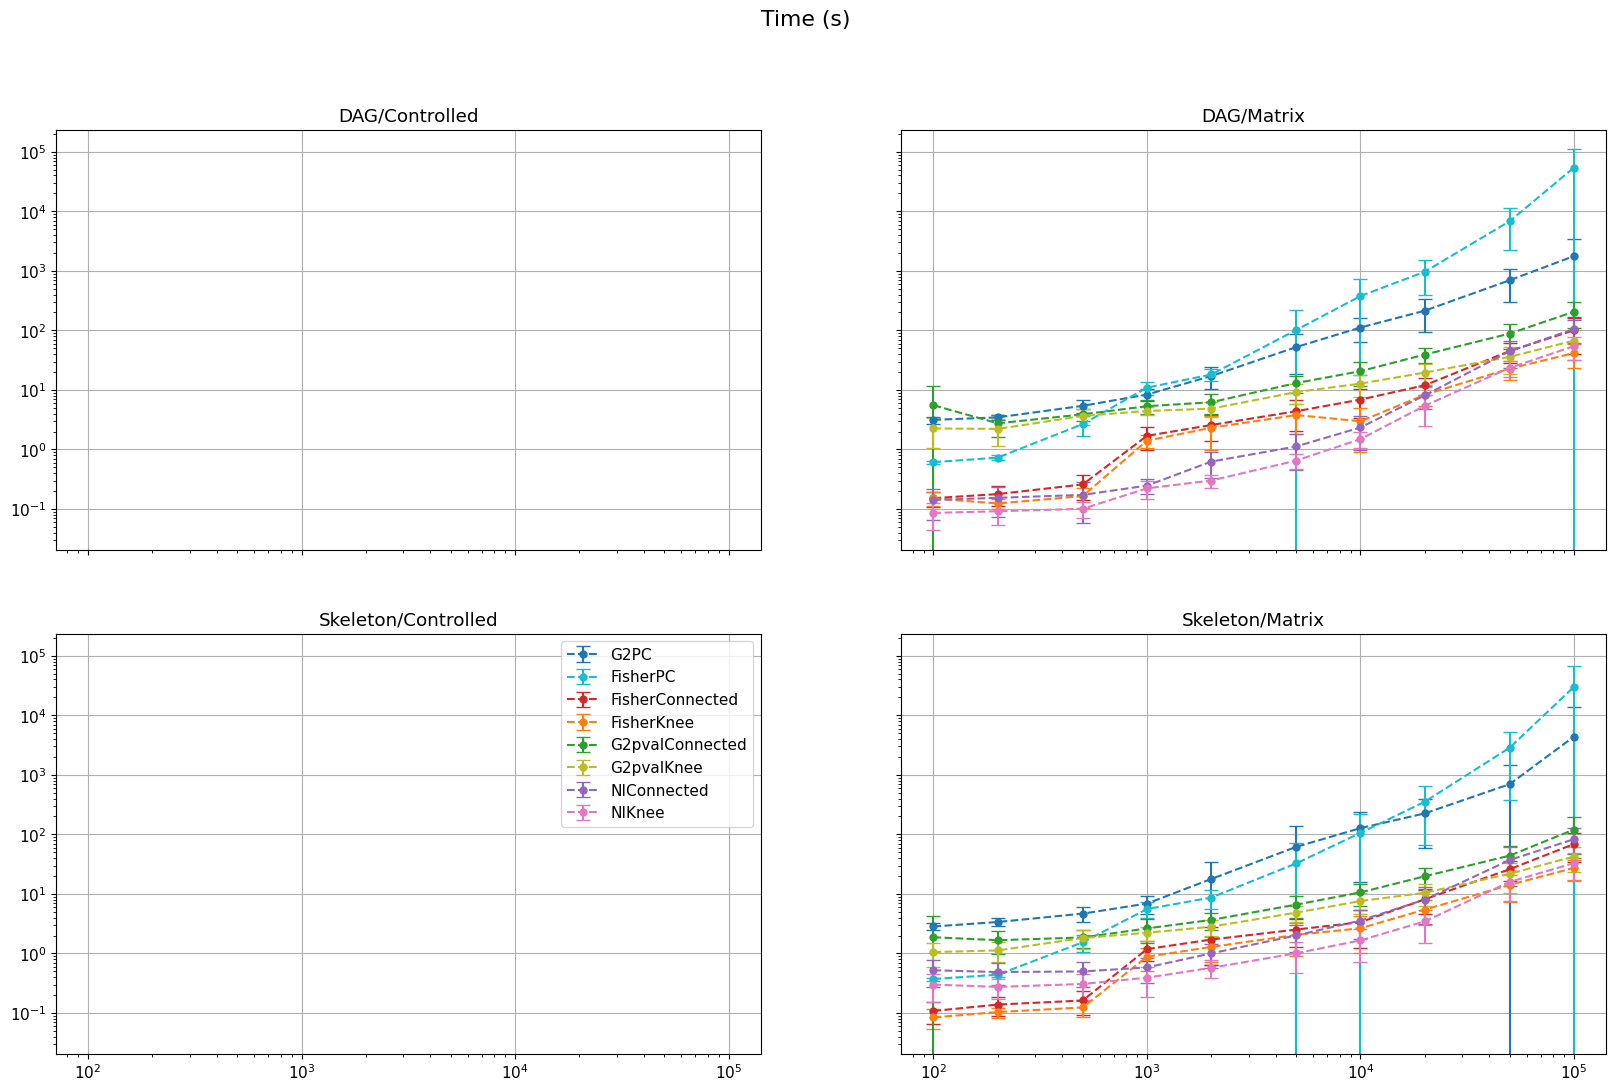

In [4]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)
        
    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()

pl.suptitle("Time (s)",fontsize="x-large")
pl.xscale("log"),pl.yscale("log")
pl.show()

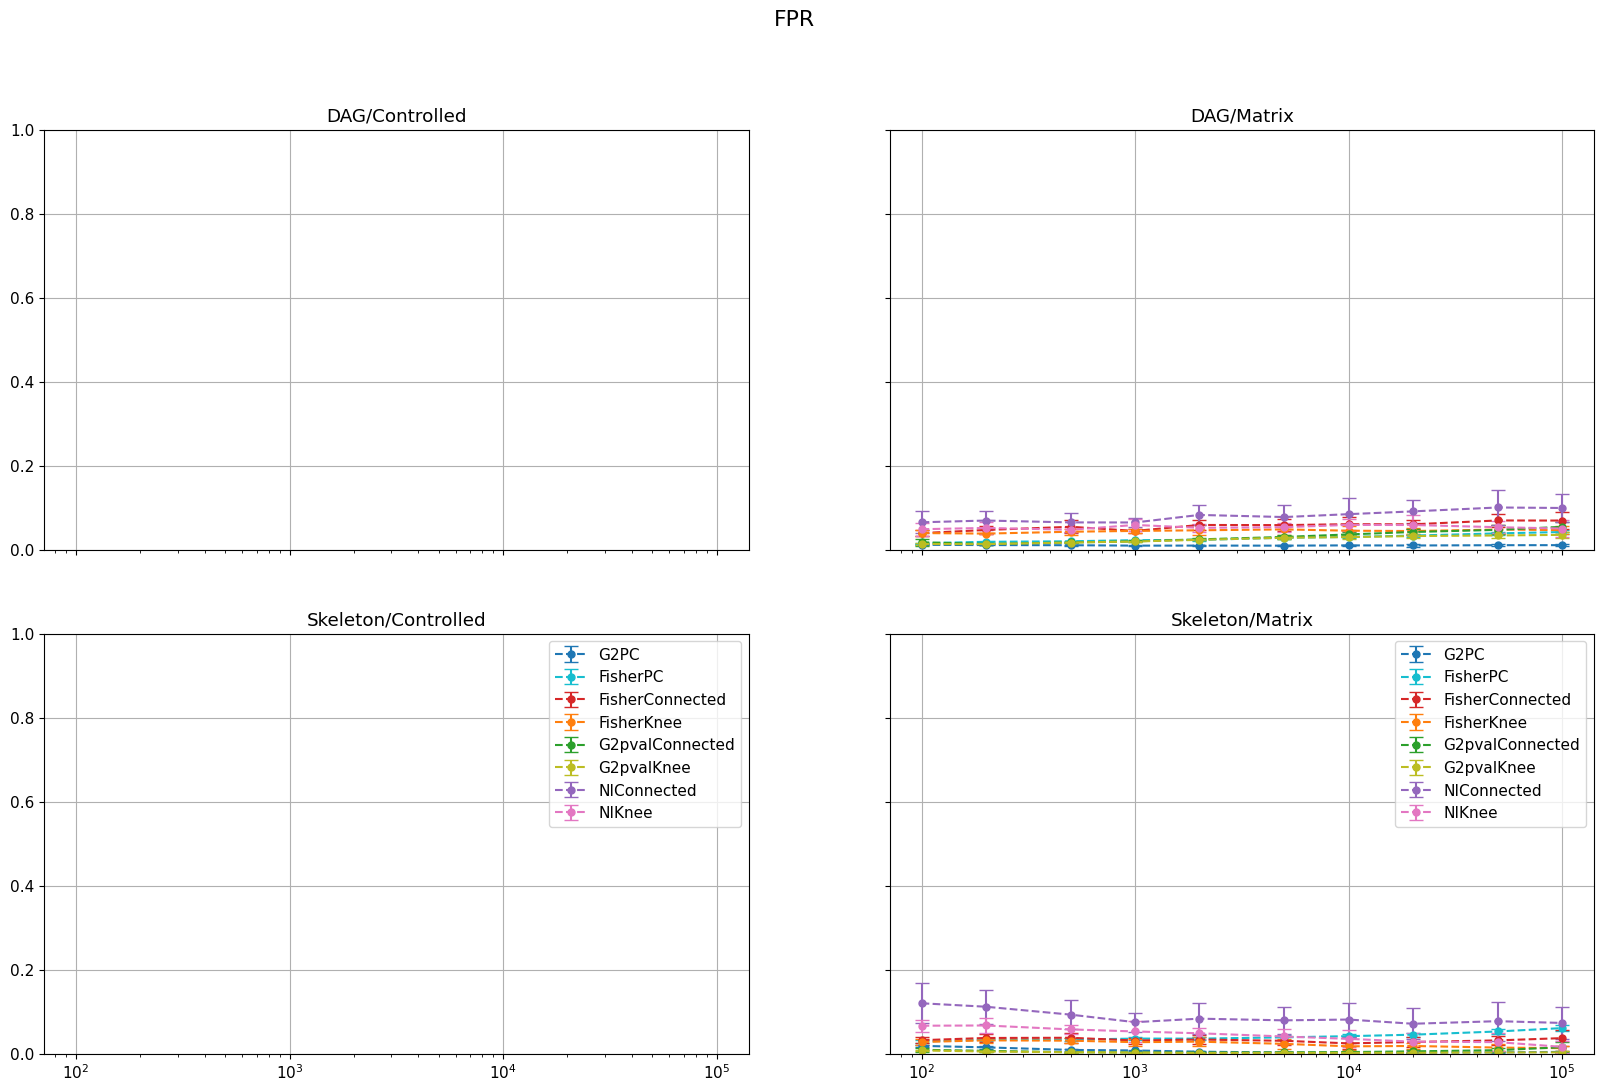

In [5]:
#False Positive Rate
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base+1
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()

pl.suptitle("FPR",fontsize="x-large")
pl.ylim(0,1)
pl.xscale("log")
pl.legend()
pl.show()

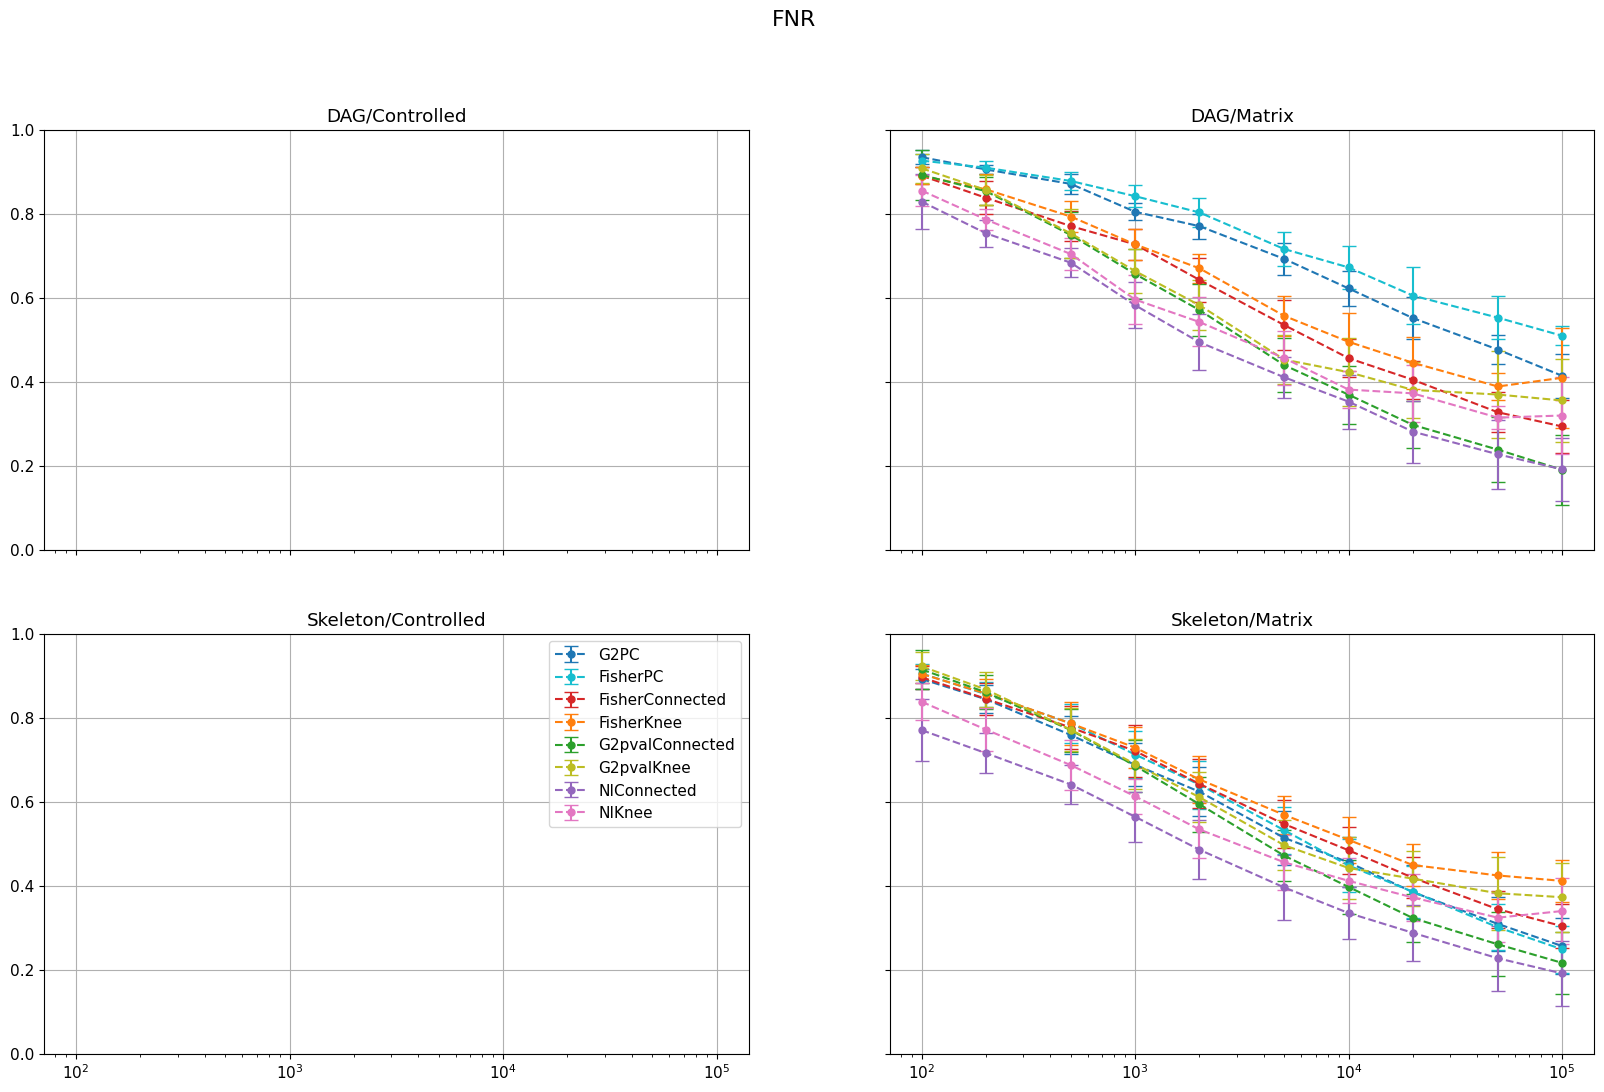

In [6]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base+2
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()

pl.suptitle("FNR",fontsize="x-large")
pl.ylim(0,1)
pl.xscale("log")
pl.show()

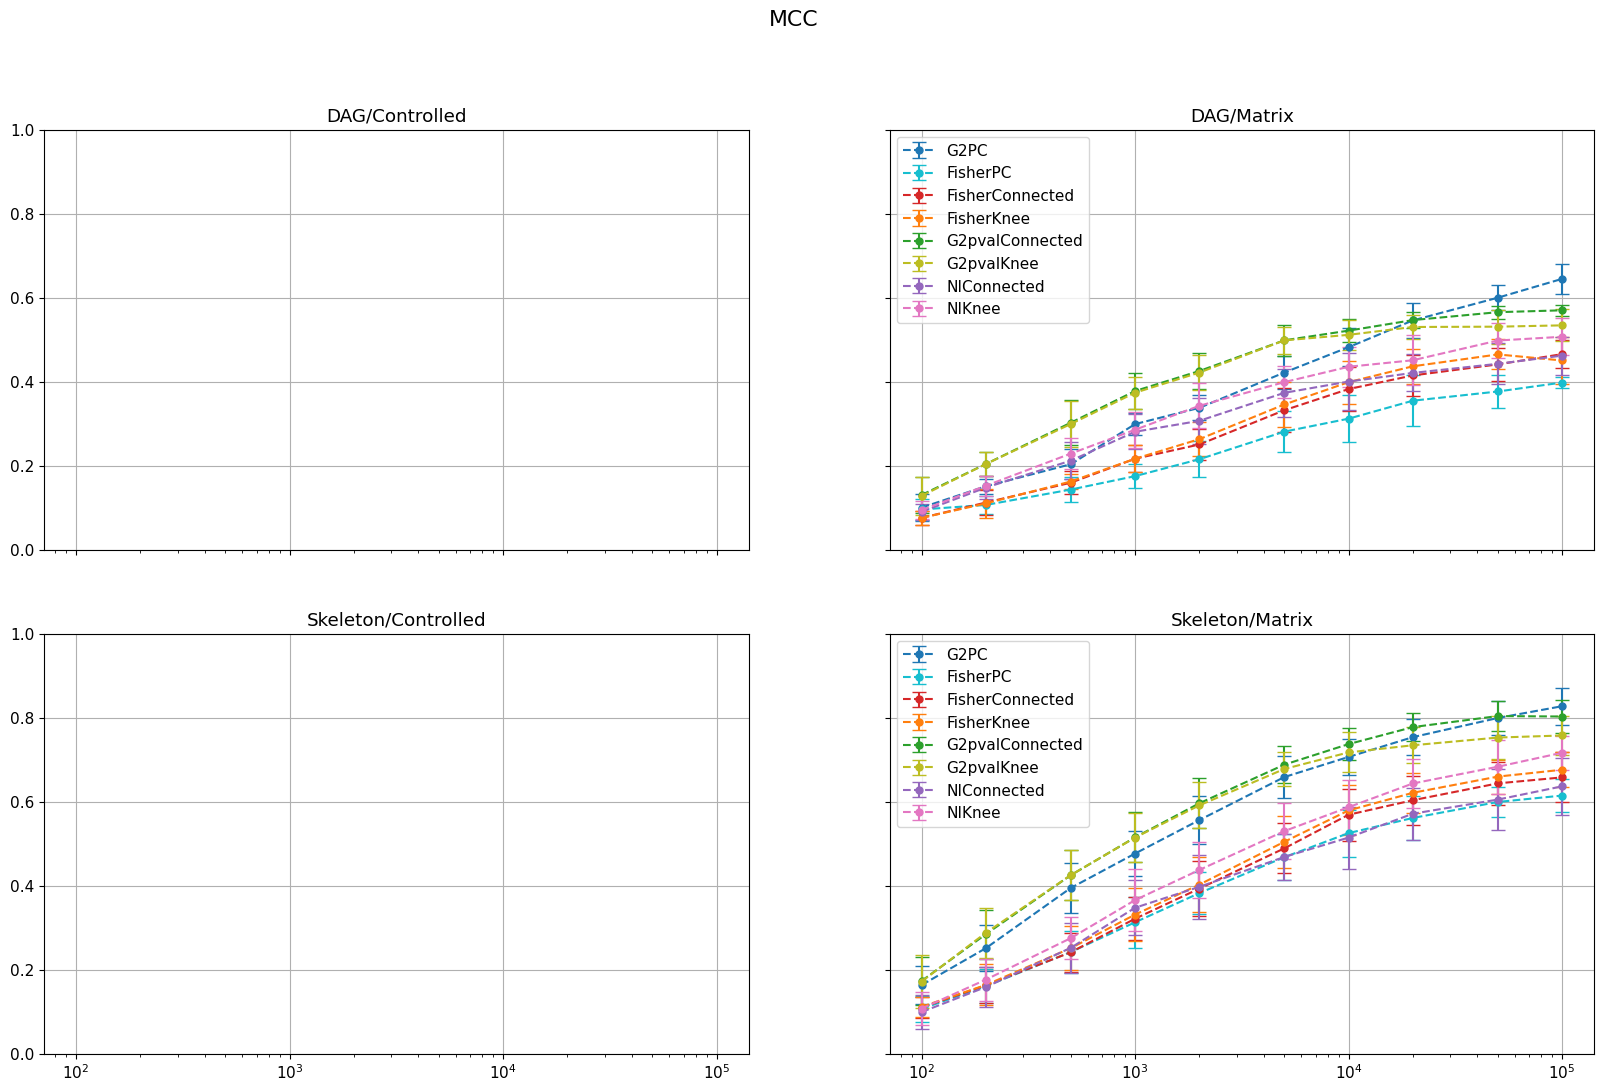

In [7]:
fig, axe = pl.subplots(nrows=2,ncols=2,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns = base+3
for j in range(4):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(len(columns)):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()

axe[1].legend()
axe[3].legend()

pl.suptitle("MCC",fontsize="x-large")
pl.ylim(0,1)
pl.xscale("log")
pl.show()

array([  1000.,   2000.,   5000.,  10000.,  20000.,  50000., 100000.])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


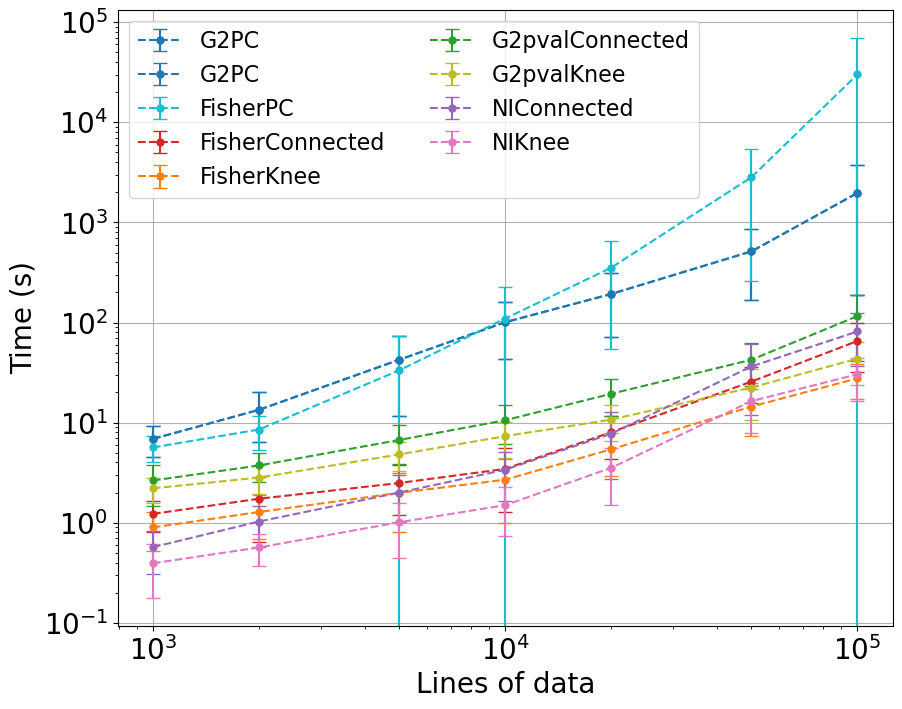

In [8]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base
j=3
n_nodes = np.unique(data[j][:,0]) ##number of nodes
n_nodes = n_nodes[n_nodes>=1000]

#Plot PC algorithm
ydata_pc = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[0]]) for n_node in n_nodes])
#axe[j].plot(n_nodes,n_nodes*0+1,marker='.',linestyle='--',color=colors[0],markersize=10,label=legends[0])
error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node],axis=0))[columns[0]] for n_node in n_nodes])
pl.errorbar(n_nodes,ydata_pc,yerr=error,marker='.',linestyle='--',ecolor=colors[0],markersize=10,label=legends[0],capsize=5)

for i in range(len(columns)):
    ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                      for n_node in n_nodes])
    pl.errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)
        
pl.grid()

#pl.suptitle("Time (s)",fontsize="x-large")
pl.xscale("log"),pl.yscale("log")
pl.ylabel("Time (s)")
pl.xlabel("Lines of data")
pl.legend(ncols=2,prop={'size': 16})
pl.savefig("Time_DepletedAutoNO_3.eps",format='eps')
pl.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


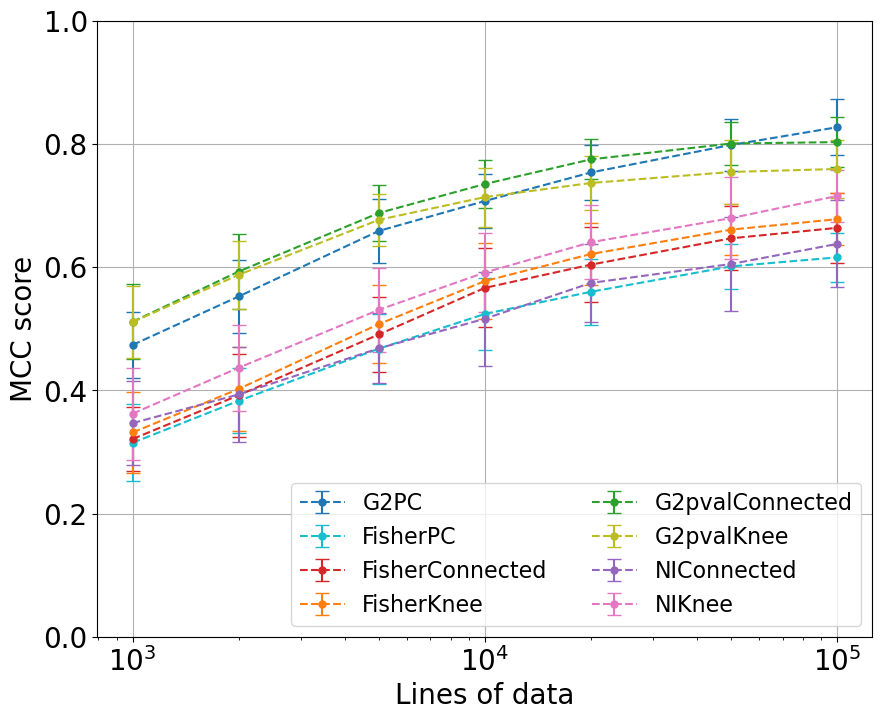

In [9]:
pl.figure(figsize=(10,8))
import matplotlib
font = {'size'   : 20}
matplotlib.rc('font', **font)

columns = base+3
j=3
n_nodes = np.unique(data[j][:,0]) ##number of nodes
n_nodes = n_nodes[n_nodes>=1000]

for i in range(len(columns)):
    ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                      for n_node in n_nodes])
    pl.errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',color=colors[i],markersize=10,label=legends[i],capsize=5)

pl.grid()

#pl.suptitle("Time (s)",fontsize="x-large")
pl.ylim(0,1)
pl.xscale("log")
pl.ylabel("MCC score")
pl.xlabel("Lines of data")
pl.legend(loc=4,ncols=2,prop={'size': 16})
pl.savefig("MCC_DepletedAutoNO_3.eps",format='eps')
pl.show()

In [10]:
[len(data[3][data[3][:,0]==n_node][:,columns[i]])
                      for n_node in n_nodes]

[13, 13, 13, 13, 13, 13, 14]

In [11]:
data[3][:,0]==1e4

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,